# Courbe des taux

## Courbe des taux avec la méthode boostrapping

In [2]:
import numpy as np
import pandas as pd

In [125]:
data = np.array([[100, 0.25, 0, 97.5],
                [100, 0.5, 0, 94.9],
                [100, 1.0, 0, 90.0],
                [100, 1.5, 0.08, 98.0],
                [100, 2.0, 0.12, 99]])
                

In [126]:
data

array([[1.00e+02, 2.50e-01, 0.00e+00, 9.75e+01],
       [1.00e+02, 5.00e-01, 0.00e+00, 9.49e+01],
       [1.00e+02, 1.00e+00, 0.00e+00, 9.00e+01],
       [1.00e+02, 1.50e+00, 8.00e-02, 9.80e+01],
       [1.00e+02, 2.00e+00, 1.20e-01, 9.90e+01]])

In [127]:
# Transformation des données en dataframe

rates = pd.DataFrame(data=data)
print(rates)

       0     1     2     3
0  100.0  0.25  0.00  97.5
1  100.0  0.50  0.00  94.9
2  100.0  1.00  0.00  90.0
3  100.0  1.50  0.08  98.0
4  100.0  2.00  0.12  99.0


In [130]:
# Noms des colonnes et étiquettes des lignes
lines_labels = ['titre 1', 'titre 2', 'titre 3', 'titre 4', 'titre 5']
columns_names = ['principal', 'maturité', 'taux_coupon', 'prix']

bonds_data = pd.DataFrame(data=data, index=lines_labels, columns=columns_names)
print(bonds_data)

         principal  maturité  taux_coupon  prix
titre 1      100.0      0.25         0.00  97.5
titre 2      100.0      0.50         0.00  94.9
titre 3      100.0      1.00         0.00  90.0
titre 4      100.0      1.50         0.08  98.0
titre 5      100.0      2.00         0.12  99.0


In [131]:
def CalculTauxZC(bonds_data):
    TauxZC=[]
    mat = []                              # Pour retenir les maturités < à la maturité courante T dans la boule suivante.
    lines = [i  for i in range (len(bonds_data.index))]                   # Liste des numéros de ligne 
    
    for T, l in zip(bonds_data['maturité'], lines) :  
        som_cf=0
        VN = bonds_data['principal'][l]          # valeur nominale
        P = bonds_data['prix'][l]                # Prix
        rT = bonds_data['taux_coupon'][l]               # taux de coupon correspondant à l'obligation de maturité T
        C=VN*rT                                        # VN*rT est le coupon de l'obligation de maturité T
        
        if T<=1 :
            t=T
            rt = (1+rT)**t -1      # Le taux de coupons correspondant à la fraction de temps t
            RT = (VN*(1+rt) / P)**(1/t)-1
            TauxZC.append(RT)
        else :
            som_cf=bonds_data['prix'][l]                  # somme de cash flows actualisés
            t = T-int(T)                                  # t est une fraction d'années
            
            if t!=0.0 :
                rt = (1+rT)**t - 1                  # Le taux de coupons correspondant à la fraction de temps t           
                som_cf-= ( VN*rt / P )**(1/t)               
                for i in range(0, int(T)) :
                    som_cf -= (C / ((1+TauxZC[i])**(i+t)))  
            else :
                for i in range(1, int(T)) :
                    som_cf -= (C / ((1+TauxZC[i])**(i+t)))
            
            A=(VN+C) / som_cf
            q=1/T
            RT = A**q - 1
            TauxZC.append(RT)
            
    return TauxZC
        
        

In [132]:
TauxZC = CalculTauxZC(bonds_data)
Maturités = bonds_data['maturité']

MaturityAndTauxZC = np.array([Maturités, TauxZC])

In [133]:
MaturityAndTauxZC

array([[0.25      , 0.5       , 1.        , 1.5       , 2.        ],
       [0.10657674, 0.11036963, 0.11111111, 0.1259645 , 0.12691841]])

In [134]:
MaturityAndTauxZC = MaturityAndTauxZC.transpose()
print(MaturityAndTauxZC)

[[0.25       0.10657674]
 [0.5        0.11036963]
 [1.         0.11111111]
 [1.5        0.1259645 ]
 [2.         0.12691841]]


In [135]:
import matplotlib.pyplot as plt

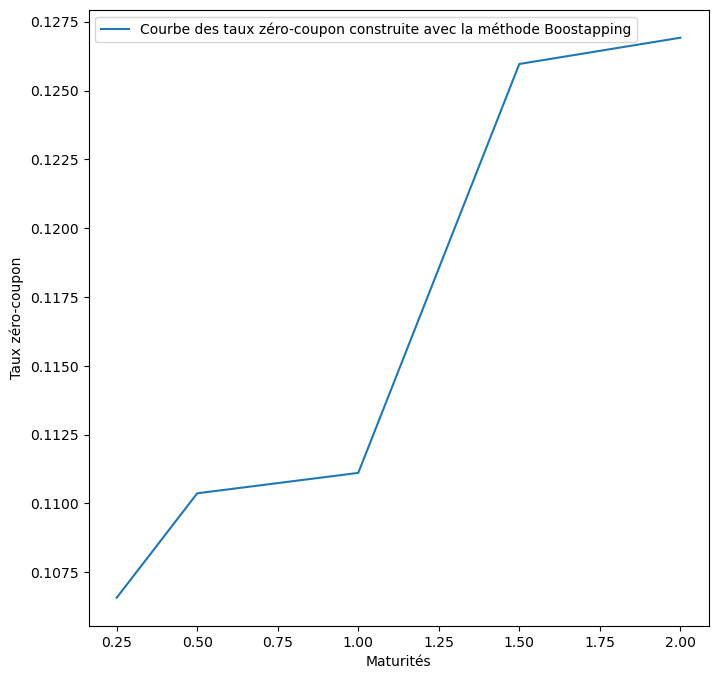

In [136]:
plt.figure(figsize = (8, 8)) # crée un graphique vide, permet de définir la taille de notre figure
plt.plot(MaturityAndTauxZC[:, 0], MaturityAndTauxZC[: ,1], 
         label = 'Courbe des taux zéro-coupon construite avec la méthode Boostapping')  
# Ajout d'une légende et noms des axes
plt.xlabel('Maturités')
plt.ylabel('Taux zéro-coupon')
plt.legend() # Définie par le paramètre label dans les fonctions
plt.show() # Affichage de la figure, cette ligne peut être néglidée dans une notebook